Mean: 38.53327056856187, Median: 37.999, Mode: -3.3379
Range: 80.9345, Standard Deviation: 12.738240029480568, IQR: 15.952450000000002


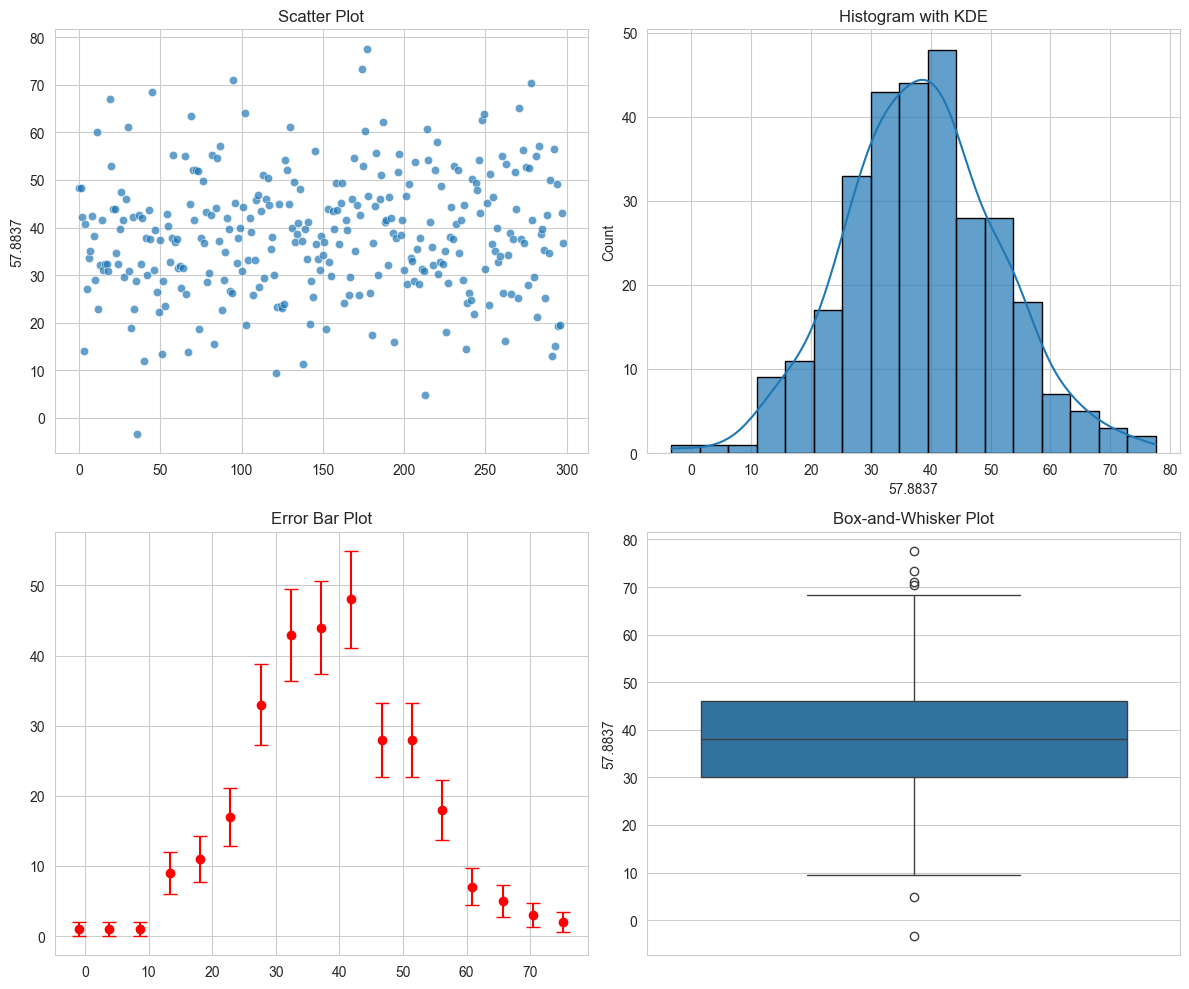

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# === 1. Load Data dari CSV ===
file_path = "C:/Users/barra/OneDrive/Documents/geostat.csv"  # Sesuaikan dengan path file CSV kamu
df = pd.read_csv(file_path)

# Pilih satu kolom numerik untuk analisis (GANTI dengan kolom yang benar dari CSV kamu)
column_name = df.select_dtypes(include=[np.number]).columns[0]  # Otomatis pilih kolom numerik pertama
data = df[column_name].dropna()  # Pastikan data tidak ada NaN

# === 2. Perhitungan Statistik Dasar ===
mean = data.mean()
median = data.median()
mode = stats.mode(data, keepdims=True)[0][0]
data_range = data.max() - data.min()
std_dev = data.std()
iqr = stats.iqr(data)

# Print hasil statistik
print(f"Mean: {mean}, Median: {median}, Mode: {mode}")
print(f"Range: {data_range}, Standard Deviation: {std_dev}, IQR: {iqr}")

# === 3. Hitung Bin Size (Freedman-Diaconis Rule) ===
bin_width = 2 * iqr * (len(data) ** (-1 / 3))
num_bins = int(np.ceil((data.max() - data.min()) / bin_width))
num_bins = max(5, num_bins)  # Minimal 5 bins agar grafik tidak terlalu kasar

# Buat distribusi frekuensi
hist, bins = np.histogram(data, bins=num_bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

# === 4. Visualisasi Data ===
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot
sns.scatterplot(x=np.arange(len(data)), y=data, ax=axes[0, 0], alpha=0.7)
axes[0, 0].set_title("Scatter Plot")

# Histogram dengan KDE
sns.histplot(data, bins=num_bins, kde=True, edgecolor="black", alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title("Histogram with KDE")

# Error bar plot
axes[1, 0].errorbar(bin_centers, hist, yerr=np.sqrt(hist), fmt='o', capsize=5, color='r')
axes[1, 0].set_title("Error Bar Plot")

# Box-and-whisker plot
sns.boxplot(y=data, ax=axes[1, 1])
axes[1, 1].set_title("Box-and-Whisker Plot")

plt.tight_layout()
plt.show()


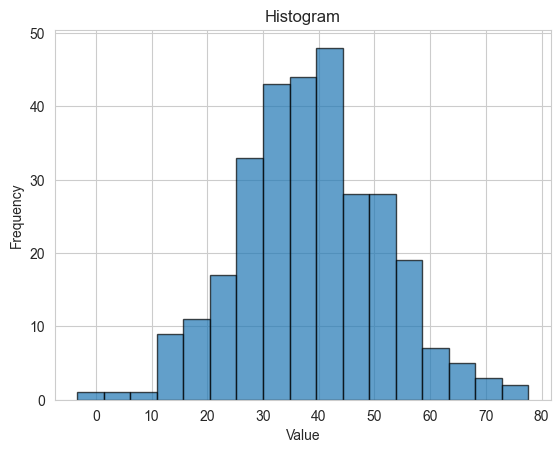

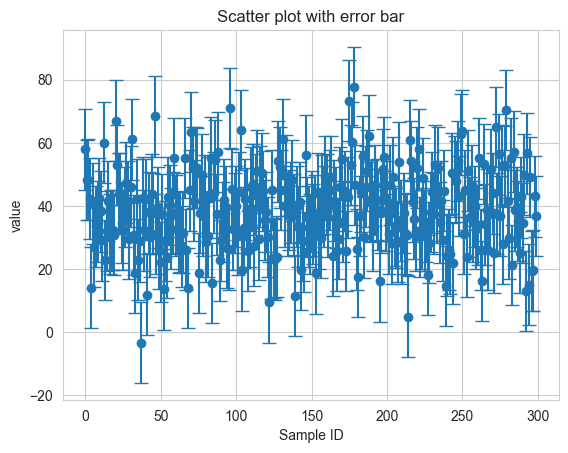

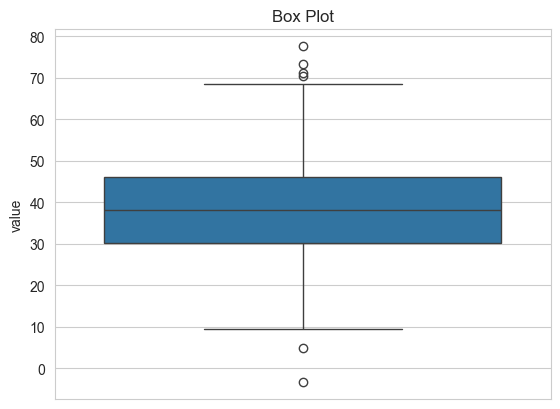

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("geostat.csv")
data = df['value']

mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data, keepdims=True).mode[0]
range_val = np.ptp(data)
std_dev = np.std(data, ddof = 1)
iqr = stats.iqr(data)

bin_size = int(np.sqrt(len(data)))
plt.hist(data, bins=bin_size, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel("Frequency")
plt.title('Histogram')
plt.show()

plt.errorbar(df.index, data, yerr=std_dev, fmt='o', capsize=5)
plt.xlabel('Sample ID')
plt.ylabel("value")
plt.title('Scatter plot with error bar')
plt.show()

sns.boxplot(y=data)
plt.title("Box Plot")
plt.show()




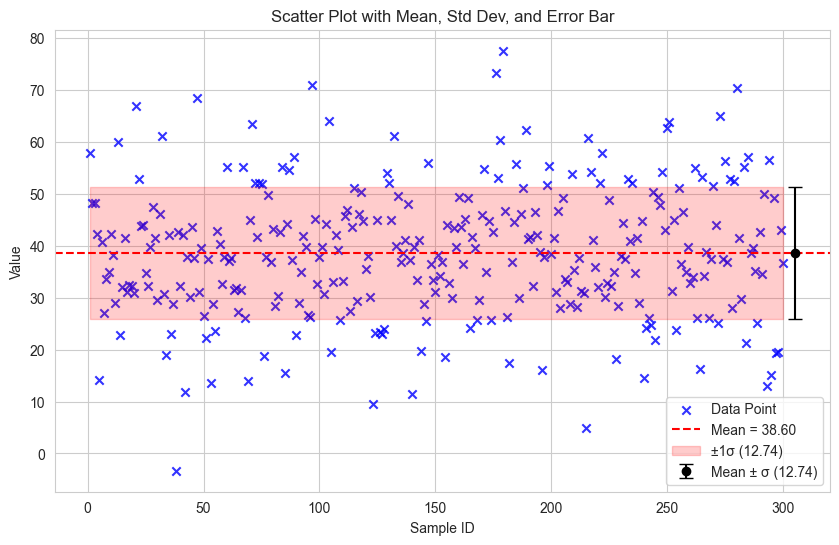

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("geostat.csv")
data = df['value']

# Buat Sample ID (anggap datanya urut dari 1 sampai jumlah data)
sample_id = np.arange(1, len(data) + 1)

mean_val = np.mean(data)
std_dev = np.std(data, ddof=0)

# Buat plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot data
ax.scatter(sample_id, data, color='blue', label="Data Point", marker='x', alpha=0.8)

# Garis Mean
ax.axhline(mean_val, color='red', linestyle='dashed', label=f"Mean = {mean_val:.2f}")

# Highlight area ±1 standar deviasi
ax.fill_between(sample_id, mean_val - std_dev, mean_val + std_dev, color='red', alpha=0.2, label=f"±1σ ({std_dev:.2f})")

# Error bar (plot kecil di samping kanan)
ax.errorbar(len(data) + 5, mean_val, yerr=std_dev, fmt='o', color='black', capsize=5, label=f"Mean ± σ ({std_dev:.2f})")

# Labels dan legend
ax.set_xlabel("Sample ID")
ax.set_ylabel("Value")
ax.set_title("Scatter Plot with Mean, Std Dev, and Error Bar")
ax.legend()
ax.grid(True)

plt.show()


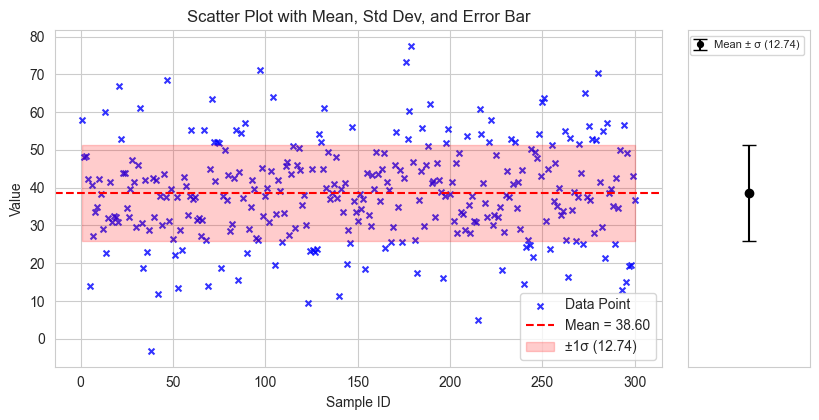

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("geostat.csv")
data = df['value']

# Buat Sample ID (anggap datanya urut dari 1 sampai jumlah data)
sample_id = np.arange(1, len(data) + 1)

mean = np.mean(data)

std_dev = np.std(data, ddof=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios':[3.5, 0.7]})

# Scatter plot data
ax1.scatter(sample_id, data, color='blue', label="Data Point", marker='x', alpha=0.8, s=18)

# Garis Mean
ax1.axhline(mean, color='red', linestyle='dashed', label=f"Mean = {mean:.2f}")

# Highlight area ±1 standar deviasi
ax1.fill_between(sample_id, mean - std_dev, mean + std_dev, color='red', alpha=0.2, label=f"±1σ ({std_dev:.2f})")
# Labels dan legend
ax1.set_xlabel("Sample ID")
ax1.set_ylabel("Value")
ax1.set_title("Scatter Plot with Mean, Std Dev, and Error Bar")
ax1.legend()
ax1.grid(True)

# Error bar (plot kecil di samping kanan)
ax2.errorbar(len(data) + 5, mean_val, yerr=std_dev, fmt='o', color='black', capsize=5, label=f"Mean ± σ ({std_dev:.2f})")
ax2.set_xticks([])  # Hilangkan angka di sumbu X
ax2.set_yticks([])  # Hapus angka di sumbu Y supaya tidak terpisah
ax2.set_ylim(ax1.get_ylim())  # Samakan batas Y
ax2.legend(fontsize=8, markerscale=0.7, handlelength=1)

plt.tight_layout(pad=0)

plt.show()


Histogram

[-3.3379, 4.8522, 9.4242, 11.415, 11.8871, 12.9578, 13.523, 13.9492, 14.0627, 14.5622, 15.0582, 15.4986, 16.0381, 16.2352, 17.414, 18.1279, 18.6096, 18.7036, 18.8744, 19.3943, 19.5297, 19.5567, 19.7309, 21.2988, 21.7576, 22.2697, 22.7705, 22.8358, 22.9565, 23.0341, 23.2885, 23.4507, 23.5143, 23.7874, 23.8904, 24.0893, 24.2406, 24.7138, 25.1189, 25.2088, 25.4236, 25.7232, 25.7238, 25.7456, 26.0113, 26.137, 26.1471, 26.1614, 26.2083, 26.2135, 26.4848, 26.6702, 27.1116, 27.1951, 27.4312, 27.9381, 28.0748, 28.1201, 28.3851, 28.4925, 28.7532, 28.7581, 28.8407, 28.8635, 29.0308, 29.0389, 29.0742, 29.3737, 29.5869, 29.6152, 29.6997, 29.9154, 29.9787, 30.0675, 30.0975, 30.175, 30.3581, 30.7733, 30.7979, 30.8952, 30.9167, 31.0387, 31.0811, 31.0925, 31.1246, 31.2292, 31.2814, 31.4763, 31.5423, 31.8902, 32.0924, 32.128, 32.1689, 32.2523, 32.2727, 32.3258, 32.3351, 32.4161, 32.5787, 32.7361, 32.8044, 32.8081, 32.8266, 32.9846, 33.0823, 33.2417, 33.4462, 33.4914, 33.5275, 33.667, 33.9453, 34.1732, 

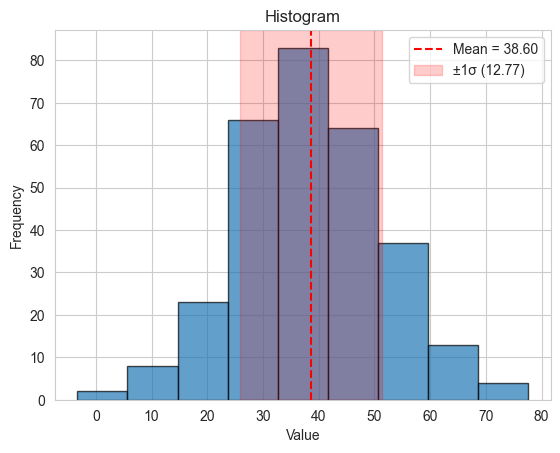

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data_sorted = sorted(data)
print(data_sorted)
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data, keepdims=True).mode[0]
range_val = np.ptp(data)
std_dev = np.std(data, ddof = 1)
iqr = stats.iqr(data)

n = len(data)
bin_size = int(1+ np.log2(n))

plt.hist(data, bins=bin_size, edgecolor='black', alpha=0.7)

# Tambahkan garis vertikal untuk mean
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean:.2f}")

# Highlight area ±1 standar deviasi
plt.axvspan(mean - std_dev, mean + std_dev, color='red', alpha=0.2, label=f"±1σ ({std_dev:.2f})")

plt.xlabel('Value')
plt.ylabel("Frequency")
plt.title('Histogram')

plt.legend()
plt.grid(True)
plt.show()

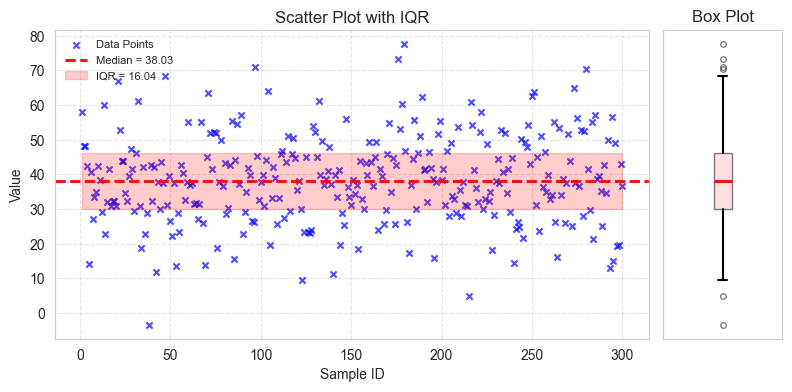

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Load Data
df = pd.read_csv("geostat.csv")
data = df['value']
sample_id = np.arange(1, len(data) + 1)

# Hitung Statistik
median = np.median(data)
iqr_value = stats.iqr(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Buat Figure dan Subplot (scatter & box plot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [3.5, 0.7]})

# **Scatter Plot**
ax1.scatter(sample_id, data, color='blue', label="Data Points", marker='x', alpha=0.7, s=20)
ax1.axhline(median, color='red', linestyle='dashed', linewidth=2, label=f"Median = {median:.2f}")
ax1.fill_between(sample_id, q1, q3, color='red', alpha=0.2, label=f"IQR = {iqr_value:.2f}")
ax1.set_xlabel("Sample ID")
ax1.set_ylabel("Value")
ax1.set_title("Scatter Plot with IQR")
ax1.legend(fontsize=8, loc="upper left", frameon=False)
ax1.grid(True, linestyle="--", alpha=0.5)

# **Box Plot**
ax2.boxplot(data, vert=True, patch_artist=True,
            boxprops=dict(facecolor='pink', alpha=0.5),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5),
            flierprops=dict(marker='o', color='black', alpha=0.5, markersize=4))
ax2.set_xticks([])  # Hilangkan angka di sumbu X
ax2.set_yticks([])  # **Hapus angka di sumbu Y supaya tidak terpisah**
ax2.set_title("Box Plot")

# **Samakan batas Y antara scatter plot dan box plot**
ax2.set_ylim(ax1.get_ylim())

# **Atur Layout supaya lebih rapat**
plt.tight_layout(pad=1)
plt.show()


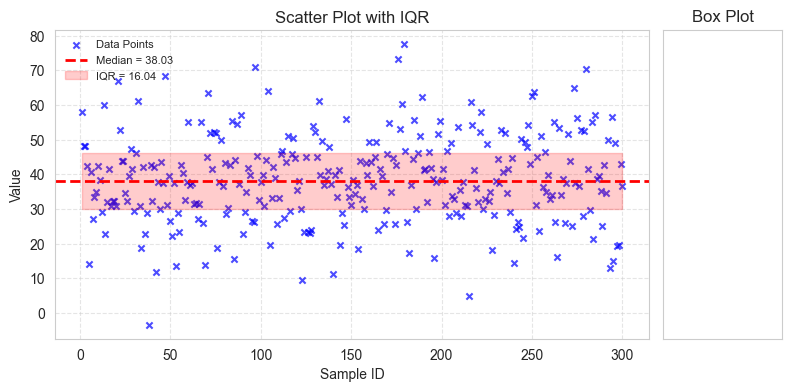

In [50]:
### VERSI 2 WHISKER BOXNYA


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Load Data
df = pd.read_csv("geostat.csv")
data = df['value']
sample_id = np.arange(1, len(data) + 1)

# Hitung Statistik
median = np.median(data)
iqr_value = stats.iqr(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Buat Figure dan Subplot (scatter & box plot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [3.5, 0.7]})

# **Scatter Plot**
ax1.scatter(sample_id, data, color='blue', label="Data Points", marker='x', alpha=0.7, s=20)
ax1.axhline(median, color='red', linestyle='dashed', linewidth=2, label=f"Median = {median:.2f}")
ax1.fill_between(sample_id, q1, q3, color='red', alpha=0.2, label=f"IQR = {iqr_value:.2f}")
ax1.set_xlabel("Sample ID")
ax1.set_ylabel("Value")
ax1.set_title("Scatter Plot with IQR")
ax1.legend(fontsize=8, loc="upper left", frameon=False)
ax1.grid(True, linestyle="--", alpha=0.5)

# **Box Plot**
ax.boxplot(data, vert=True, patch_artist=True,
            whis=[0, 80],   # Biar whisker dari min ke max data
            boxprops=dict(facecolor='pink', alpha=0.5),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5),
            flierprops=dict(marker='o', color='black', alpha=0.5, markersize=4))

ax2.set_xticks([])  # Hilangkan angka di sumbu X
ax2.set_yticks([])  # **Hapus angka di sumbu Y supaya tidak terpisah**
ax2.set_title("Box Plot")

# **Samakan batas Y antara scatter plot dan box plot**
ax2.set_ylim(ax1.get_ylim())

# **Atur Layout supaya lebih rapat**
plt.tight_layout(pad=1)
plt.show()


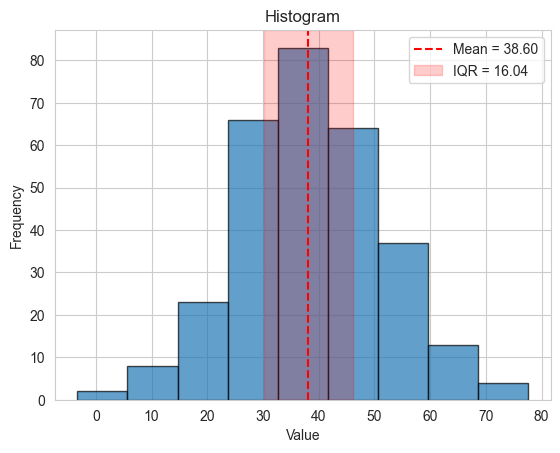

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

median = np.median(data)
n = len(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = stats.iqr(data)

bin_size = int(1 + np.log2(n))

plt.hist(data, bins=bin_size, edgecolor='black', alpha=0.7)

# Tambahkan garis vertikal untuk median
plt.axvline(median, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean = {mean:.2f}")

# Highlight area IQR
plt.axvspan(q1, q3, color='red', alpha=0.2, label=f"IQR = {iqr:.2f}")

plt.xlabel('Value')
plt.ylabel("Frequency")
plt.title('Histogram')

plt.legend()
plt.grid(True)
plt.show()

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

df = pd.read_csv("geostat.csv")
data = df['value']
data_sorted = sorted(data)

sample_id = np.arange(1, len(data) + 1)
mean = np.mean(data)
std_dev = np.std(data)
median = np.median(data_sorted)

variance = np.var(data)
range = max(data) - min(data)
q1 = np.percentile(data_sorted, 25)
q3 = np.percentile(data_sorted, 75)
iqr = q3 - q1

print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Median:", median)
print("Mode:", mode)
print("Variance:", variance)
print("Range:", range)
print("Q1:", q1)
print("Q3:", q3)
print("IQR: ", iqr)




Mean: 38.597772
Standard Deviation: 12.744605811255312
Median: 38.03365
Mode: 57.8837
Variance: 162.42497728428268
Range: 80.9345
Q1: 30.155625
Q3: 46.198750000000004
IQR:  16.043125000000003
